<a href="https://colab.research.google.com/github/kin0969/LendInvest/blob/master/DNN_Bad_loan_detection_w_o_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import csv

# Import DNN Keras framework
%tensorflow_version 2.x  #Specific the TF version during Colab update
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten,MaxPooling1D
from tensorflow.python.keras.optimizers import SGD, Adam
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras import regularizers



 

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  #Specific the TF version during Colab update`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
# Mount Google Drive for read and write
from google.colab import drive
drive.mount('/content/gdrive')
input_x_y_path="/content/gdrive/My Drive/Colab Notebooks/LendInvest/DNN/Raw Data/Input X and Y/"+"Train_X_Y_20191230_160354.csv"

predict_x_test_path="/content/gdrive/My Drive/Colab Notebooks/LendInvest/DNN/Raw Data/Predict_X_test/"+"Predict_X_test_2019_09_24.csv"
predict_result_X_test_path="/content/gdrive/My Drive/Colab Notebooks/LendInvest/DNN/Result/"+"predict_result_X_test.csv"
general_result_path="/content/gdrive/My Drive/Colab Notebooks/LendInvest/DNN/Result/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Read from Raw Data
raw_data=np.genfromtxt((input_x_y_path) ,delimiter=',') 
X_raw=raw_data[1:,2:8];
X_train = np.delete(X_raw, 3, 1)  # delete second column of C
Y_train=raw_data[1:,8];

# # Fill nan with 0
where_nas=np.isnan(X_train)
X_train[where_nas]=0

# Change numpy array type 
X_train = X_train.astype('float64') 
Y_train = Y_train.astype('float64') 



In [0]:
def _normalize_column_normal(X, train=True, specified_column = None, X_mean=None, X_std=None):
    # The output of the function will make the specified column number to 
    # become a Normal distribution
    # When processing testing data, we need to normalize by the value 
    # we used for processing training, so we must save the mean value and 
    # the variance of the training data
    if train:
        if specified_column == None:
            specified_column = np.arange(X.shape[1])
        length = len(specified_column)    
        X_mean = np.reshape(np.mean(X[:, specified_column],0), (1, length))
        X_std  = np.reshape(np.std(X[:, specified_column], 0), (1, length))

    X[:,specified_column] = np.divide(np.subtract(X[:,specified_column],X_mean), X_std)
    return X, X_mean, X_std

In [0]:
def _shuffle(X, Y):
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    return X[randomize], Y[randomize]
    
def train_dev_split(X, y, dev_size=0.25):    
    train_len = int(round(len(X)*(1-dev_size)))
    return X[0:train_len,], y[0:train_len,], X[train_len:,], y[train_len:,]

In [0]:
def train(X_train, Y_train):    
    dev_size=0.25     #小數點百分比
    loss_train=[]  #Base on Cross entropy
    loss_dev=[]   #Base on Cross entropy
    acc_train=[]
    acc_dev=[]  
    
    # Split a test Set
    X_train, Y_train, X_dev, Y_dev=train_dev_split(X_train,Y_train,dev_size)
    
#     # Transform Y label to 2 column binary format which is for multi-clasification
#     from keras.utils import to_categorical
#     Y_train = to_categorical(Y_train,2)
#     Y_dev = to_categorical(Y_dev,2)
    
    
# from keras.layers import LeakyReLU    
    model=Sequential()
    model.add(Dense(input_dim=5,units=3,activation='softmax',kernel_regularizer=regularizers.l2(0.01)))
    
    # model.add(Dense(input_dim=5,units=100,activation='linear',kernel_regularizer=regularizers.l2(0.01)))
    # model.add(LeakyReLU(alpha=.005))
#     model.add(Dense(input_dim=106,units=666,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
    
    
    for i in range(70):
      model.add(Dense(units=3,activation='softmax',kernel_regularizer=regularizers.l2(0.01)))

#         model.add(Dense(units=666,activation='relu',kernel_regularizer=regularizers.l2(0.01)))

        # model.add(Dense(units=100,activation='linear',kernel_regularizer=regularizers.l2(0.01)))
        # model.add(LeakyReLU(alpha=.005))
#         model.add(Dropout(0.5))


        
#     which is for multi-clasification
#     model.add(Dense(units=2,activation='softmax',kernel_regularizer=regularizers.l2(0.01)))
#     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
   
    
#     model.add(Dense(units=1,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    

    # 最後Layer改成sigmoid 才是2元分類結果
    model.add(Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

      
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#     model.summary()
    
    history=model.fit(X_train,Y_train,validation_split=0.000001,batch_size=30,epochs=350)
#     history=model.fit(X_train,Y_train,validation_split=0.1155,batch_size=600,epochs=50)
    return history,model  # return loss for plotting

In [0]:
# These are the columns that I want to normalize
col = [0,1,2,3,4]
X_train, X_mean, X_std = _normalize_column_normal(X_train, specified_column=col)

# return loss is to plot the result
history,model= train(X_train, Y_train)

Train on 259 samples, validate on 1 samples
Epoch 1/350
259/259 [==============================] - 6s 21ms/sample - loss: 2.9012 - accuracy: 0.2664 - val_loss: 2.9046 - val_accuracy: 0.0000e+00
Epoch 2/350
259/259 [==============================] - 0s 332us/sample - loss: 2.8368 - accuracy: 0.2664 - val_loss: 2.8350 - val_accuracy: 0.0000e+00
Epoch 3/350
259/259 [==============================] - 0s 288us/sample - loss: 2.7740 - accuracy: 0.2664 - val_loss: 2.7667 - val_accuracy: 0.0000e+00
Epoch 4/350
259/259 [==============================] - 0s 341us/sample - loss: 2.7128 - accuracy: 0.2664 - val_loss: 2.7000 - val_accuracy: 0.0000e+00
Epoch 5/350
259/259 [==============================] - 0s 325us/sample - loss: 2.6530 - accuracy: 0.2664 - val_loss: 2.6353 - val_accuracy: 0.0000e+00
Epoch 6/350
259/259 [==============================] - 0s 322us/sample - loss: 2.5948 - accuracy: 0.2664 - val_loss: 2.5722 - val_accuracy: 0.0000e+00
Epoch 7/350
259/259 [==============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


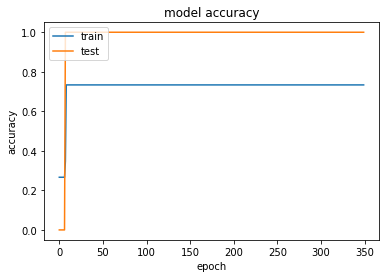

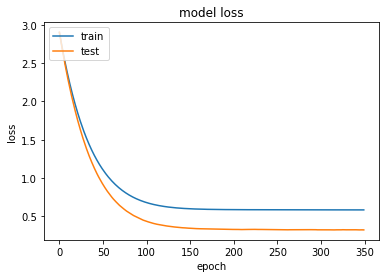

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
    
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Predict Test Data
# Just for LoanID output
X_test_LoanID=np.genfromtxt((predict_x_test_path) ,delimiter=',',dtype="U75") 
    
X_test_data=np.genfromtxt((predict_x_test_path) ,delimiter=',') 
X_test_raw=X_test_data[1:,2:8];
X_test = np.delete(X_test_raw, 3, 1)  # delete second column of C


# # Fill nan with 0
where_nas=np.isnan(X_test)
X_test[where_nas]=0

# Change numpy array type 
X_test = X_test.astype('float64') 


# Do the same data process to the test data
X_test, _, _= _normalize_column_normal(X_test, train=False, specified_column = col, X_mean=X_mean, X_std=X_std)


# Predict will give either 0 or 1 as output
# Predict_proba will give the only probability of 1.

result=model.predict_classes(X_test)
print(result)

result2=model.predict_proba(X_test)
print(result2)


# Print Y_dev,Y_dev_pred,y_dev_pred_func_raw     
csv_f = open(predict_result_X_test_path,"w")
csv_w = csv.writer(csv_f)
title = ['LoanID','Result_label','Equal to 1 raw']
csv_w.writerow(title) 
for i in range(X_test.shape[0] ):
    content = [X_test_LoanID[i+1,1],result[i],result2[i]]
    csv_w.writerow(content)

[[1]
 [1]
 [1]]
[[0.7273769]
 [0.7273769]
 [0.7273769]]
